# Operadores de píxel

Brillo
Contraste
Gamma

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


In [2]:
# Cargar una imagen en modo monocromático (un canal)
#img = cv.imread('imgBloque1.bmp',cv.IMREAD_GRAYSCALE)
img = cv.imread('mib-alien.jpg',cv.IMREAD_GRAYSCALE)

#### Ejemplo: Cambio de contraste

In [3]:
def change_contrast(input_image:np.ndarray, contrast:int) -> np.ndarray: 
    '''
    Argumentos
    img: Imagen de entrada
    contrast: Valor porcentual de contraste
    ---------------------------------------
    Retorno
    Imagen: (numpy.ndarray) con el nuevo contraste
    '''
    img_new = (1 + contrast / 100) * input_image
    # Clip trunca a lo que se le diga (0 a 255)
    np.clip(img_new, 0, 255, out = img_new)
    # Hay que castear a 8 bits   
    img_new = img_new.astype('uint8')         

    return img_new



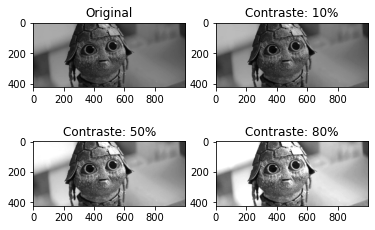

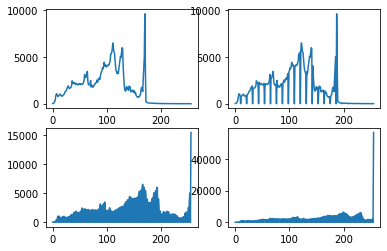

In [4]:
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist1, bins1 = np.histogram(img.ravel(), 256, [0,256])

# Modificamos contraste 10%
new_contrast = 10
img_mod = change_contrast(input_image=img, contrast=new_contrast)

ax2=plt.subplot(222)
ax2.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
ax2.set_title(f'Contraste: {new_contrast}%')

hist2,bins2 = np.histogram(img_mod.ravel(),256,[0,256])

# Modificamos contraste 50%
new_contrast = 50
img_mod = change_contrast(input_image=img, contrast=new_contrast)

ax3=plt.subplot(223)
ax3.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
ax3.set_title(f'Contraste: {new_contrast}%')

hist3,bins3 = np.histogram(img_mod.ravel(),256,[0,256])

# Modificamos contraste 80%
new_contrast = 80
img_mod = change_contrast(input_image=img, contrast=new_contrast)

ax4=plt.subplot(224)
ax4.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
ax4.set_title(f'Contraste: {new_contrast}%')

hist4,bins4 = np.histogram(img_mod.ravel(),256,[0,256])

plt.show()

# Nueva figura
fig = plt.figure()

# Histogramas de la imagen
plt.subplot(221), plt.plot(hist1)
plt.subplot(222), plt.plot(hist2)
plt.subplot(223), plt.plot(hist3)
plt.subplot(224), plt.plot(hist4)
plt.show()


#### Ejemplo: Cambio de brillo

In [5]:
def change_brightness(input_image:np.ndarray, bright:int) -> np.ndarray: 
    '''
    Argumentos
    img: Imagen de entrada
    bright: Valor porcentual de brillo
    ---------------------------------------
    Retorno
    Imagen: (numpy.ndarray) con el nuevo brillo
    '''
    img_new = img + (255 * bright / 100)
    # Clip trunca a lo que se le diga (0 a 255)
    np.clip(img_new, 0, 255, out = img_new)
    # Hay que castear a 8 bits   
    img_new = img_new.astype('uint8')         

    return img_new

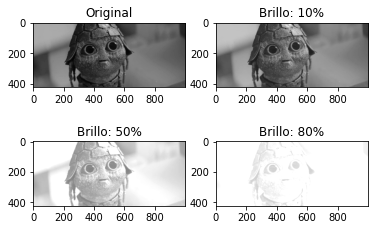

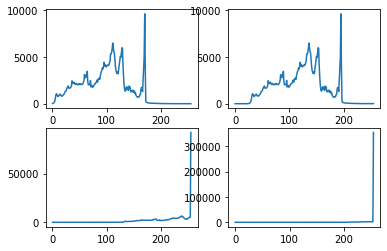

In [6]:
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

# Modificamos brillo 10%
new_bright = 10
img_mod = change_brightness(input_image=img, bright=new_bright)
ax2=plt.subplot(222)
ax2.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Brillo: 10%')

hist2,bins2 = np.histogram(img_mod.ravel(), 256, [0, 256])

# Modificamos brillo 50%
new_bright = 50
img_mod = change_brightness(input_image=img, bright=new_bright)
ax3=plt.subplot(223)
ax3.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
ax3.set_title('Brillo: 50%')

hist3,bins3 = np.histogram(img_mod.ravel(),256,[0,256])

# Modificamos brillo 80%
new_bright = 80
img_mod = change_brightness(input_image=img, bright=new_bright)
ax4=plt.subplot(224)
ax4.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
ax4.set_title('Brillo: 80%')

hist4,bins4 = np.histogram(img_mod.ravel(),255,[0,255])

plt.show()

# Nueva figura
fig = plt.figure()

# Histogramas de la imagen
plt.subplot(221), plt.plot(hist1)
plt.subplot(222), plt.plot(hist2)
plt.subplot(223), plt.plot(hist3)
plt.subplot(224), plt.plot(hist4)
plt.show()


#### Corrección por Gamma

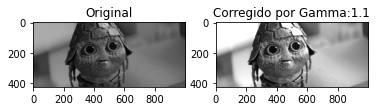

In [7]:
gamma = 1.1
img_mod = np.power(img, gamma)
ax1=plt.subplot(121)
ax1.set_title('Original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
ax2=plt.subplot(122)
ax2.set_title('Corregido por Gamma:1.1')
plt.imshow(img_mod, cmap='gray', vmin=0, vmax=255)

plt.show()

### Histograma 2D

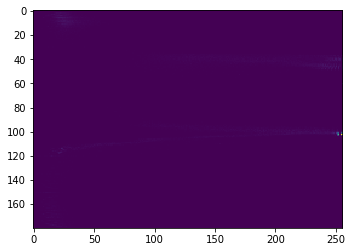

In [8]:
img = cv.imread('paisaje.png')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hist = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

plt.imshow(hist, interpolation = 'nearest')
plt.show()